In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [138]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [140]:
data = pd.read_csv("/baseball_players.csv", index_col = 0)

In [141]:
data

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [142]:
data.columns

Index(['Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

In [143]:
df=pd.DataFrame(data,columns=data.columns)

In [144]:
df

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,Catcher,74,180.0,22.99
Paul_Bako,BAL,Catcher,74,215.0,34.69
Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...
Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19


In [145]:
df.isnull().sum()

Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [146]:
dataset=df.dropna(axis=0)

In [148]:
dataset.isnull().sum()

Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

Text(0.5, 1.0, 'Postion Count')

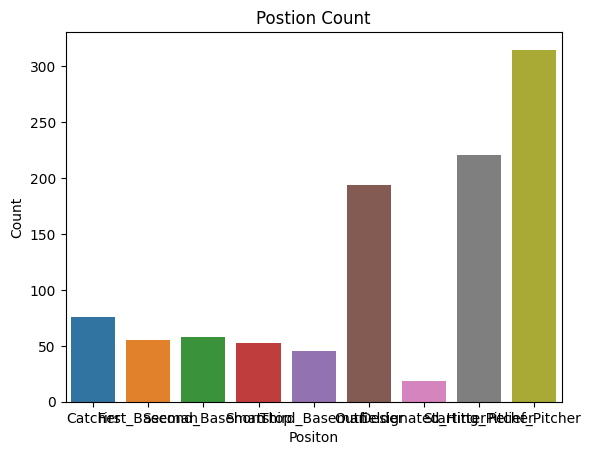

In [149]:
sns.countplot(data=df,x="Position")
plt.xlabel("Positon")
plt.ylabel("Count")
plt.title("Postion Count")

<Axes: xlabel='Position', ylabel='Height(inches)'>

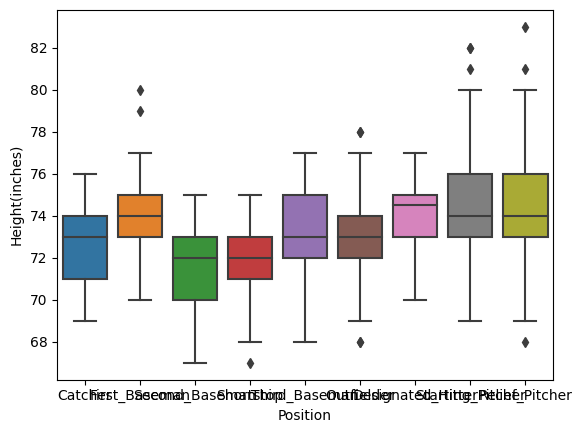

In [150]:
sns.boxplot(x="Position",y="Height(inches)",data=df)

Text(0.5, 1.0, 'Records per position')

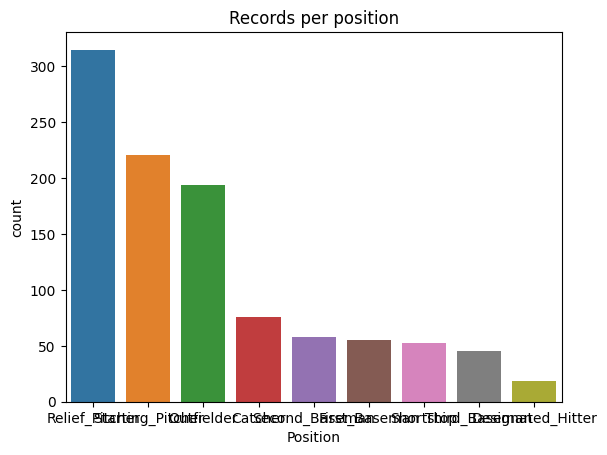

In [151]:
sns.countplot(x="Position",data=df,
              order=df.Position.value_counts().index)
plt.title("Records per position")

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])
df.head()

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,BAL,0,74,180.0,22.99
Paul_Bako,BAL,0,74,215.0,34.69
Ramon_Hernandez,BAL,0,72,210.0,30.78
Kevin_Millar,BAL,2,72,210.0,35.43
Chris_Gomez,BAL,2,73,188.0,35.71


In [153]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Team']=le.fit_transform(df['Team'])
df.head()

,Team,Position,Height(inches),Weight(pounds),Age
Name,,,,,
Adam_Donachie,3,0,74,180.0,22.99
Paul_Bako,3,0,74,215.0,34.69
Ramon_Hernandez,3,0,72,210.0,30.78
Kevin_Millar,3,2,72,210.0,35.43
Chris_Gomez,3,2,73,188.0,35.71


In [155]:
new_df=dataset[['Position','Height(inches)',	'Weight(pounds)',	'Age']]

Text(0.5, 1.0, 'Records per position')

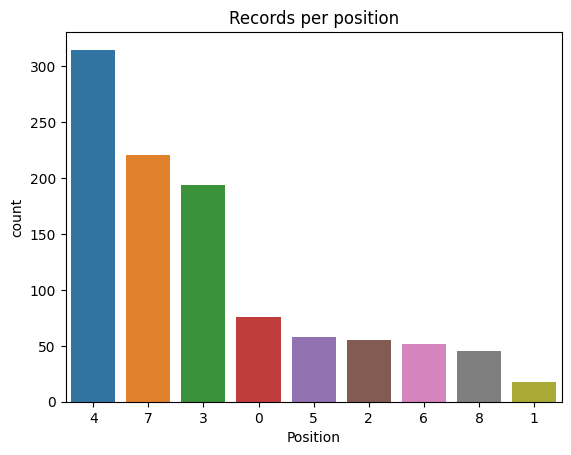

In [156]:
sns.countplot(x="Position",data=df,
              order=df.Position.value_counts().index)
plt.title("Records per position")

In [158]:
X= dataset.drop(['Position', 'Team'], axis=1)
X.head()

,Height(inches),Weight(pounds),Age
Name,,,
Adam_Donachie,74,180.0,22.99
Paul_Bako,74,215.0,34.69
Ramon_Hernandez,72,210.0,30.78
Kevin_Millar,72,210.0,35.43
Chris_Gomez,73,188.0,35.71


In [159]:
X=X.to_numpy()

In [160]:
y=y.to_numpy()

In [161]:
y=dataset['Position']
y.value_counts()

Relief_Pitcher       315
Starting_Pitcher     220
Outfielder           194
Catcher               76
Second_Baseman        58
First_Baseman         55
Shortstop             52
Third_Baseman         45
Designated_Hitter     18
Name: Position, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [164]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.29343629343629346


In [165]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.28957528957528955


In [167]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2972972972972973
[[ 0  0  0  7 15  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  3 12  0  0  3  0]
 [ 0  0  0 11 27  0  0  2  0]
 [ 0  0  0 12 53  0  0 11  0]
 [ 0  0  0  5 13  0  0  0  0]
 [ 0  0  0  3 10  0  0  1  0]
 [ 0  0  0  7 34  0  0 13  0]
 [ 0  0  0  4 12  0  0  0  0]]
